## Observations and Insights 

In [ ]:
#Observations
#1) Capomulin and Ramicane were the most effective drugs in reducing tumor volume.
#2) The correlation coefficient = 0.84. This tells us that there is a strong, but not perfect correlation 
#between mouse weight and average tumor volume.
#3) The treatment of mouse s185 with the drug Capomulin showed that as time went on, tumor volume decreased

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
data_combined['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_combined.sort_values(['Mouse ID', 'Timepoint'])
duplicates.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_part2 = data_combined.sort_values(['Mouse ID', 'Timepoint'])
duplicates_part2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_combined_clean = duplicates_part2.drop_duplicates(subset=["Mouse ID"])
data_combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
474,a262,Placebo,Female,17,29,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
494,a366,Stelasyn,Female,16,29,0,45.0,0
...,...,...,...,...,...,...,...,...
1860,z435,Propriva,Female,12,26,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
cleaned_df =duplicates_part2.loc[duplicates_part2['Mouse ID'].isin(data_combined_clean)==False]

cleaned_df = data_combined.loc[data_combined['Mouse ID']!='g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()
#data_combined_clean

248

In [8]:
data_combined_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
474,a262,Placebo,Female,17,29,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
494,a366,Stelasyn,Female,16,29,0,45.0,0


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

regimen = data_combined.groupby(["Drug Regimen"])
regimen

regimen_mean = regimen["Tumor Volume (mm3)"].mean()

regimen_median = regimen["Tumor Volume (mm3)"].median()

regimen_variance = regimen["Tumor Volume (mm3)"].var()

regimen_std = regimen["Tumor Volume (mm3)"].std()

regimen_sem = regimen["Tumor Volume (mm3)"].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Data Points')

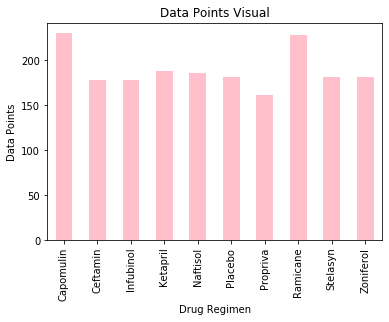

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_data_points = data_combined.groupby(["Drug Regimen"]).count()["Mouse ID"]

regimen_data_points.plot(kind="bar", color = 'pink')

# Labels
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


In [12]:
regimen_data_points = data_combined.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Data Points')

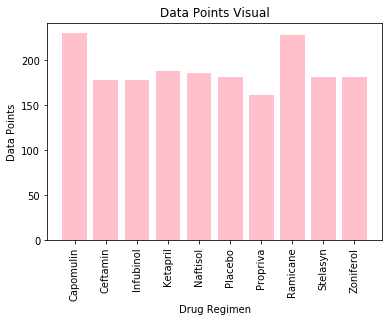

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

numberofusers = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, numberofusers, color='pink', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie Plots

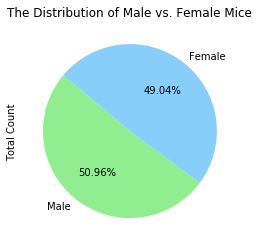

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#gender = cleaned_df.groupby(["Mouse ID","Sex"])
#gender
#mouse_gender1 = pd.DataFrame(gender.size())
#mouse_gender2 = pd.DataFrame(mouse_gender1.groupby(["Sex"]).count())
#mouse_gender2.columns = ["Total Count"]
#plot = mouse_gender2.plot.pie(y="Total Count", figsize=(6,6), colors = ['pink', 'blue'],  startangle=140, autopct="%1.2f%%")


plt.figure()
cleaned_df['Sex'].value_counts().plot(kind='pie', colors = ['lightgreen', 'lightskyblue'], startangle=140, autopct="%1.2f%%");
plt.title('The Distribution of Male vs. Female Mice')
plt.ylabel("Total Count")
plt.show()






Text(0, 0.5, 'Total Count')

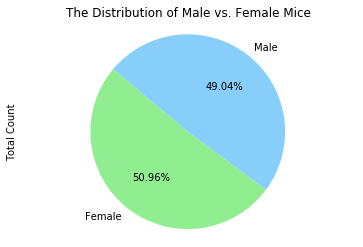

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [50.96,49.04]
plt.pie(sizes, labels= ["Female","Male"], colors= ['lightgreen', 'lightskyblue'], autopct="%1.2f%%", startangle=140)
plt.axis("equal")
plt.title('The Distribution of Male vs. Female Mice')
plt.ylabel("Total Count")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

bestregimens = data_combined[data_combined["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
bestregimens = bestregimens.sort_values(["Timepoint"], ascending=True)
bestregimens

bestregimens_data = bestregimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

bestregimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [17]:
#IQR
Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumors1 = data_combined.loc[data_combined['Timepoint'] == 45]

tumors = tumors1['Tumor Volume (mm3)']
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumors is: {lowerq}")
print(f"The upper quartile of tumors is: {upperq}")
print(f"The interquartile range of tumors is: {iqr}")
print(f"The the median of tumors is: {quartiles[0.5]} ")

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

SyntaxError: invalid syntax (<ipython-input-17-1264a5638cb0>, line 2)

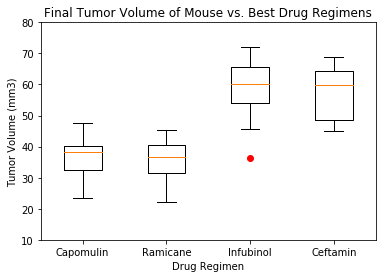

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bestregimens_sort = bestregimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
bestregimens_sort
bestregimens_sort.head()

bestregimen = bestregimens_sort.to_frame()
bestregimen

best_four = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

regimens_final = bestregimen.reset_index()
tumor_lists = regimens_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(best_four)
tumor_volume = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=best_four, sym= 'ro')
plt.title('Final Tumor Volume of Mouse vs. Best Drug Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

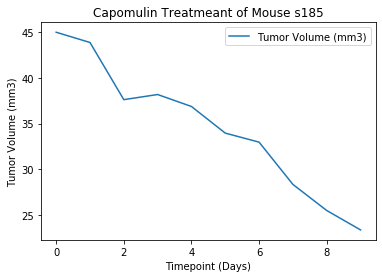

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

timevstumor = data_combined[data_combined["Mouse ID"].isin(["s185"])]
timevstumor

timevstumordata = timevstumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timevstumordata

lineplot = timevstumordata.reset_index()
lineplot

lineplot2 = lineplot[["Mouse ID", "Tumor Volume (mm3)"]]
lineplot2

line = lineplot2.plot.line()

plt.title('Capomulin Treatmeant of Mouse s185')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

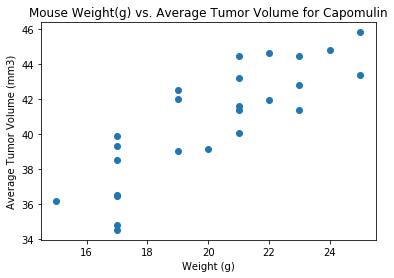

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
capomulin_df.head()

capomulinaverage = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulinaverage['Weight (g)'],capomulinaverage['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight(g) vs. Average Tumor Volume for Capomulin')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

y = 0.95x + 21.55


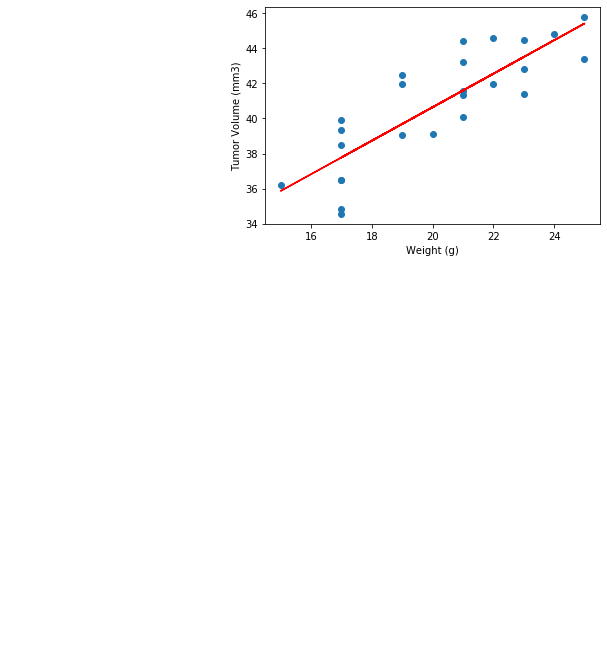

y = 0.95x + 21.55


In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumorvolume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

m_slope = 0.9544396890241045
b_intercept = 21.552160532685015

x_values = weight
y_values = tumorvolume
regress_values = x_values * m_slope + b_intercept
line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(b_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f'{line_eq}')
plt.show()

print(f'{line_eq}')

In [22]:
#Find the correlation coefficient
correlationcoefficient=round(st.pearsonr(capomulinaverage['Weight (g)'],capomulinaverage['Tumor Volume (mm3)'])[0],2)
print(correlationcoefficient)

0.84


In [23]:
#Find the linear regression model
model=st.linregress(capomulinaverage['Weight (g)'],capomulinaverage['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)